In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    import tensorflow as tf
except:
    !pip install --upgrade tensorflow
    !pip install keras
    !pip install --ignore-installed --upgrade tensorflow-gpu
    !pip install wrapt==1.11.1
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    import tensorflow as tf

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
from datetime import datetime

def collect_data(symbol, start_date):
    end_date = datetime.now().strftime('%Y-%m-%d')
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Test the function
df = collect_data('MSFT', '2021-01-01')
print(type(df))


[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>


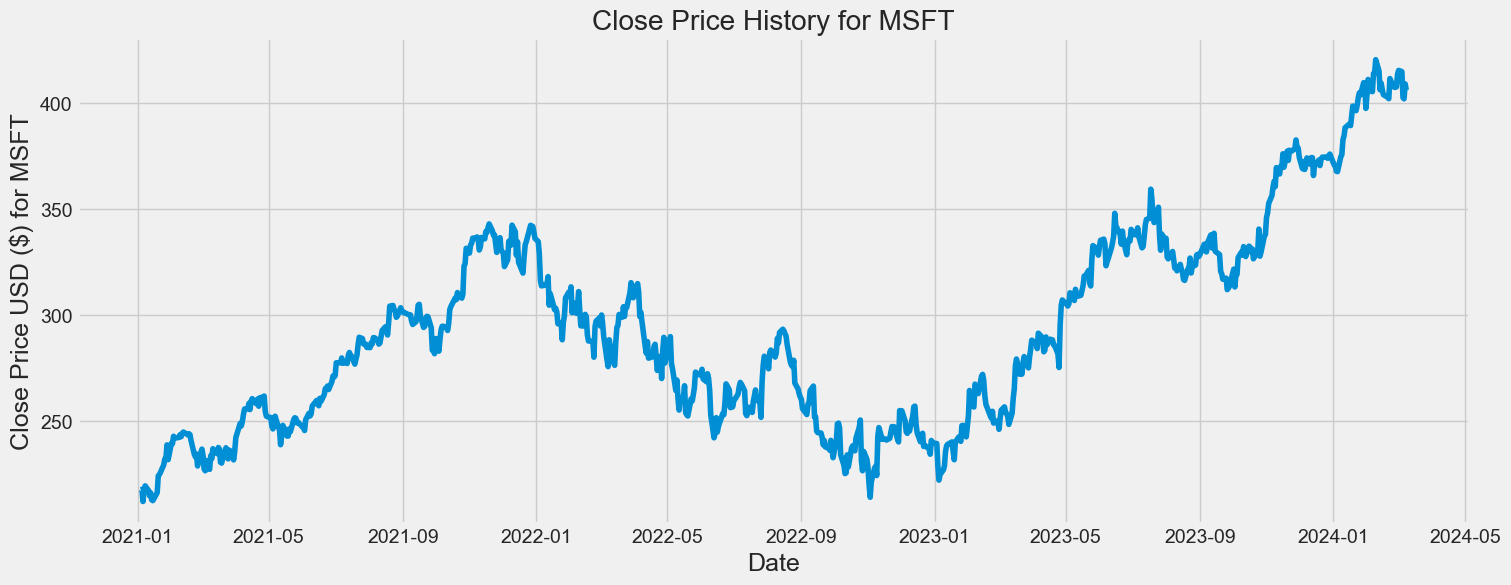

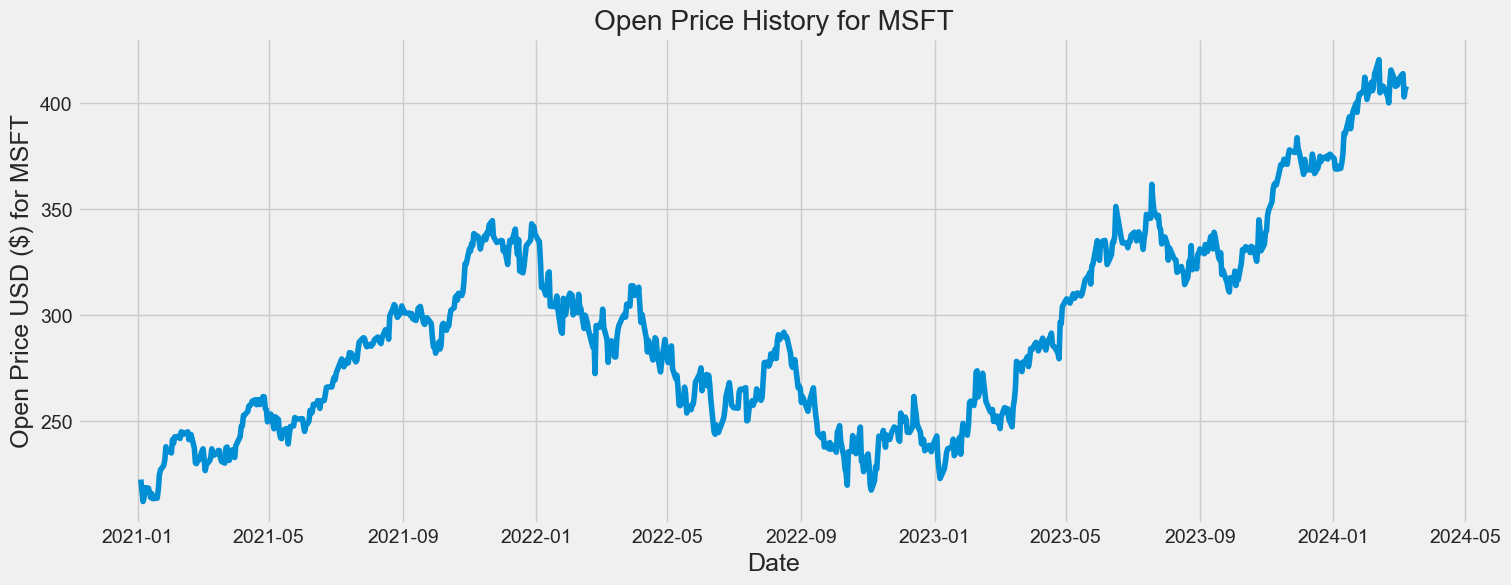

In [7]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(df, 'Close', 'MSFT')
plot_close_val(df, 'Open',  'MSFT')

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
df['Returns'] = (df['Close']/df['Close'].shift(1))-1

# Drop the NaN values created by the percentage change
df = df.dropna()

# Display the updated dataset with the 'Returns' column
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-05  217.259995  218.520004  215.699997  217.899994  211.809464   
2021-01-06  212.169998  216.490005  211.940002  212.250000  206.317352   
2021-01-07  214.039993  219.339996  213.710007  218.289993  212.188568   
2021-01-08  218.679993  220.580002  217.029999  219.619995  213.481354   
2021-01-11  218.470001  218.910004  216.729996  217.490005  211.410904   

              Volume   Returns  
Date                            
2021-01-05  23823000  0.000965  
2021-01-06  35930700 -0.025929  
2021-01-07  27694500  0.028457  
2021-01-08  22956200  0.006093  
2021-01-11  23031300 -0.009699  


In [10]:
features = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns']]


In [11]:
scalar=StandardScaler()
scalar.fit(features)


StandardScaler()

In [12]:
scaled_data=scalar.transform(features)

In [13]:
pca=PCA(n_components=1)

In [14]:
pca.fit(scaled_data)

PCA(n_components=1)

In [15]:
x_pca=pca.transform(scaled_data)

In [16]:
x_pca.shape

(799, 1)

In [17]:
x_pca

array([[-3.51555191e+00],
       [-3.84777459e+00],
       [-3.55548445e+00],
       [-3.42671880e+00],
       [-3.50199563e+00],
       [-3.62034424e+00],
       [-3.57132242e+00],
       [-3.71820014e+00],
       [-3.78752964e+00],
       [-3.65779286e+00],
       [-3.39206772e+00],
       [-3.23527912e+00],
       [-3.12180996e+00],
       [-3.06841997e+00],
       [-3.03144621e+00],
       [-3.08552989e+00],
       [-2.73507171e+00],
       [-2.93579474e+00],
       [-2.61520526e+00],
       [-2.47286156e+00],
       [-2.38943839e+00],
       [-2.38789981e+00],
       [-2.32276736e+00],
       [-2.33598937e+00],
       [-2.31582375e+00],
       [-2.29506479e+00],
       [-2.19803125e+00],
       [-2.20132142e+00],
       [-2.29658204e+00],
       [-2.30373235e+00],
       [-2.27536488e+00],
       [-2.39467299e+00],
       [-2.80915641e+00],
       [-2.88977480e+00],
       [-2.82061504e+00],
       [-3.05724660e+00],
       [-2.92595825e+00],
       [-2.63908552e+00],
       [-2.6

In [18]:
pca_columns = ['Principal_Component']  # Customize column names if needed
x_pca_df = pd.DataFrame(x_pca, columns=pca_columns)
print(x_pca_df.head())

   Principal_Component
0            -3.515552
1            -3.847775
2            -3.555484
3            -3.426719
4            -3.501996


In [19]:
def build_training_dataset(input_ds):
    # Create a new dataframe with only the 'Close column 
    input_ds.reset_index()
    data = input_ds.filter(items=['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))
    return data, dataset, training_data_len

#Test the function
training_data_df, training_dataset_np, training_data_len = build_training_dataset(df)
dataset=training_dataset_np
data=training_data_df

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
def scale_the_data(dataset):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    return scaler, scaled_data

#Test the function
scaler, scaled_data = scale_the_data(training_dataset_np)

In [21]:
def build_training_dataset_pca(input_ds):
    # Create a new dataframe with only the 'Close column 
    input_ds.reset_index()
    data_pca = input_ds.filter(items=['Principal_Component'])
    # Convert the dataframe to a numpy array
    dataset_pca = data.values
    # Get the number of rows to train the model on
    training_pca_data_len = int(np.ceil( len(dataset) * .95 ))
    return dataset_pca, training_pca_data_len

#Test the function
training_pca_dataset_np, training_pca_data_len = build_training_dataset_pca(x_pca_df)

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
def scale_the_data(dataset):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    return scaler, scaled_data

#Test the function
scaler_pca, scaled_data_pca = scale_the_data(training_pca_dataset_np)

In [23]:
# Create the training data set 
# Create the scaled training data set
def split_train_dataset(training_data_len):
    train_data = scaled_data_pca[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        if i<= 61:
            #print(x_train)
            #print(y_train)
            print('.')
            
    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    return x_train, y_train

#Test the function
x_train,y_train = split_train_dataset(training_pca_data_len)

.
.


In [24]:
def build_lstm_model(x_train,y_train):
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    return model 

#Test the function
lstm_model = build_lstm_model(x_train,y_train)




700/700 [==============================] - 20s 23ms/step - loss: 0.0047


In [25]:
def create_testing_data_set(model, scaler, training_data_len, test_data_len):
    # Create the testing data set
    # Assuming test_data is a 2D array
    test_data = scaled_data[training_data_len - test_data_len:, :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(test_data_len, len(test_data)):
        x_test.append(test_data[i - test_data_len:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data to match model's expected input shape
    x_test = x_test[:, :60]  # Select the first 60 timesteps

    # Get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    return x_test, y_test, predictions, rmse

# Test the function
TEST_DATA_LENGTH = 100
x_test, y_test, predictions, rmse = create_testing_data_set(lstm_model, scaler, training_data_len, TEST_DATA_LENGTH)

2/2 [==============================] - 1s 25ms/step


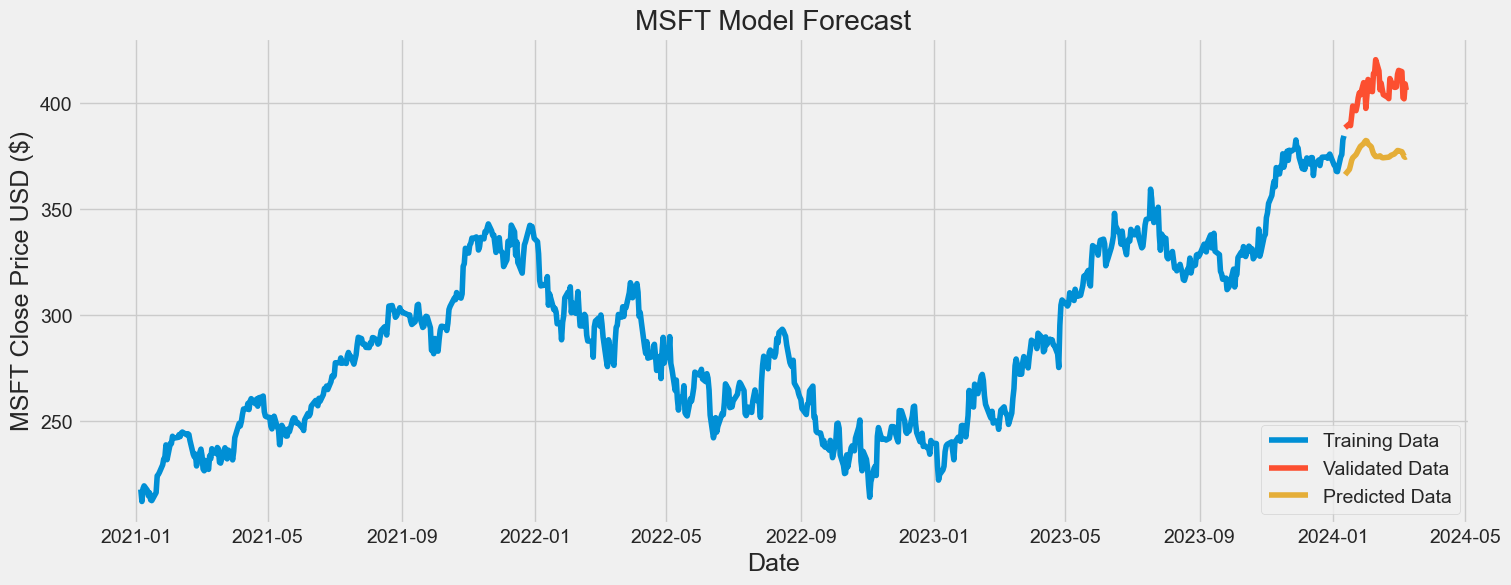

In [29]:
def plot_predictions(stock, data,training_data_len):
    #Plot the data
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    # Visualize the data
    plt.figure(figsize=(16,6))
    title = stock + ' Model Forecast'
    ylabel = stock + ' Close Price USD ($)'
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Training Data', 'Validated Data', 'Predicted Data'], loc='lower right')
    plt.show()
    return valid
    
#Test the function
valid = plot_predictions('MSFT',data,training_data_len)